<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

In [4]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This dataset contains information on the characteristics of various airfoils tested in a NASA wind tunnel and the 'scaled sound pressure level, in decibels' as the output variable. I don't know if it's actually the sound level itself that interests NASA engineers or whether the output variable is actually used to measure the pressure of the air flowing off of the airfoil, or what, but I'm sure it would be important for some fancy rocket science thing.

- Find out how many rows and columns are in `noise`.

In [5]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [6]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [7]:
noise.info() #  No null values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency                 1503 non-null int64
angle                     1503 non-null float64
chord_length              1503 non-null float64
free_stream_velocity      1503 non-null float64
displacement_thickness    1503 non-null float64
self_noise                1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [8]:
noise.describe() #  Measure of central tendency - mean, measure of dispersion - standard deviation

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

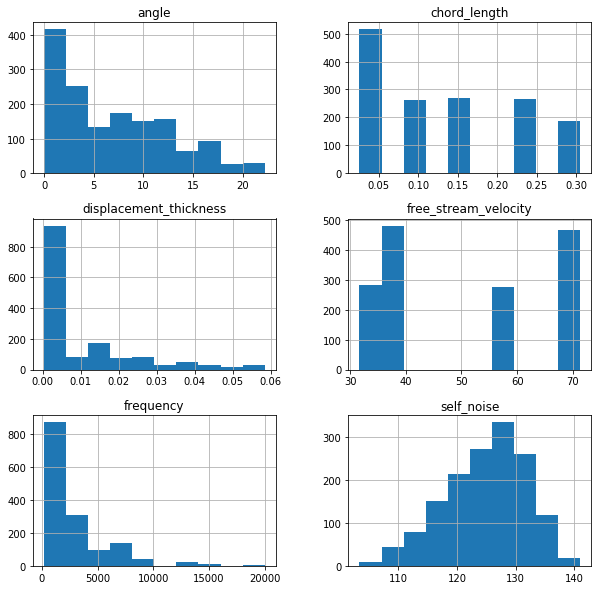

In [9]:
noise.hist(figsize=(10,10));

- Which variables are approximately normally distributed?

self_noise has some normal characteristics, though it is still mildly skew left. None of the rest are approximately normall distributed.

- Which variables show strong skew?

Angle, displacement_thickness, and frequency are each skew right, and chord_length is a bit skewed right, though not too much.

- Make a scatterplot of each feature variable with the target variable "self_noise".

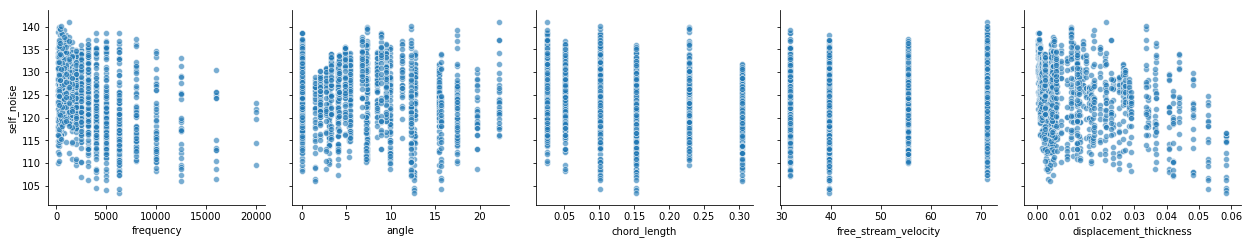

In [10]:
sns.pairplot(
    data=noise,
    x_vars=noise.drop('self_noise', axis='columns').columns,
    y_vars = ['self_noise'],
    plot_kws={'alpha':.6},
    height=3.5
);

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

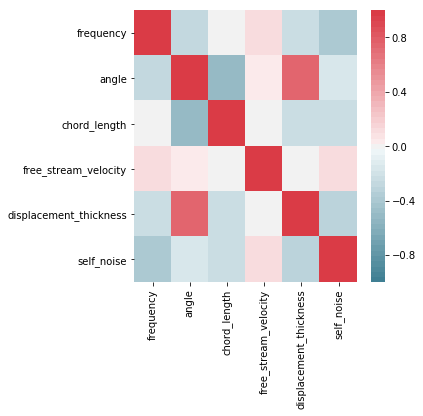

In [11]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(noise.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=51)
           )

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Well it's nice to see that each of the variables have a moderately strong correlation with self_noise, meaning they could each but useful in a model. That said, some of them are also highly correlated with each other. For instance, displacement_thickness and angle are highly correlated, so I would probably only include one of them in my model. Possibly the same with chord_length and angle.

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
feature_cols = ['frequency', 'angle', 'free_stream_velocity']
target_col = 'self_noise'

X = noise.loc[:, feature_cols]
y = noise.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
lr = LinearRegression()

lr.fit(X_train, y_train)
print(f'Training score: {lr.score(X_train, y_train)}')
print(f'Test score: {lr.score(X_test, y_test)}')

Training score: 0.26833985014178063
Test score: 0.27019507231613915


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

 The model could defintely stand to be more complex, as the training score is not very high. This tells us that the bias is low.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performance jumps around a bit as the train/test split changes, but the training score is consistently in the upper-mid .20s and the test score is usually right around there, too. There doesn't appear to be too much variance, as there isn't a large gap between the train score and test score on average.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model currently has more of a bias problem, as the performance on the training set is quite poor, and the test set performance isn't notably worse.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [14]:
from sklearn.ensemble import RandomForestRegressor
feature_cols = ['frequency', 'angle', 'free_stream_velocity']
target_col = 'self_noise'

X = noise.loc[:, feature_cols]
y = noise.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.8775582173655829
0.6584722613773627


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

This model has significantly improved performance over the linear regression model. Its bias is much lower than in the regression model. While the variance is technically higher since the gap between the training and tests scores is a bit higher, the performance on the test set itself is so improved that I would take these results, even with the higher variance, over the linear regression model any day.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I did two things to improve performance: I increased the number of trees generated fom 100 to 200, and I made the model more complex by including all of the columns except for the target column in X, rather than worrying about correlations and feature engineering. I was a bit surprised that the performance jumped so much when I made the changes to the model, but c'est la vie.

In [15]:
from sklearn.ensemble import RandomForestRegressor
target_col = 'self_noise'

X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
rfr = RandomForestRegressor(n_estimators=200)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9895148318451245
0.927618303780926


- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is a dataset on credit-card applications. The various fields are attributes of a given applicant's application, credit history, and any other relevant information for the application. The target variable is the simple binary of "Was this applicant approved?", which is represented by column 16. A model for this could be useful because sometimes you might have much of the underlying data behind an application but you don't actually know whether the applicant was approved, and this provides a way to estimate the result of the application.

In [16]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [17]:
credit.shape #  690 rows, 16 columns

(690, 16)

- Find out what data types are present.

In [18]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [19]:
def parse_obj_float(val):
    new_val = ''
    for character in val:
        if character in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']:
            new_val = new_val + character
    if len(new_val) == 0:
        return
    else:
        return float(new_val)
    
def parse_obj_int(val):
    new_val = ''
    for character in val:
        if character in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']:
            new_val = new_val + character
    if len(new_val) == 0:
        return
    else:
        return int(new_val)

In [20]:
credit[2] = credit[2].apply(parse_obj_float)
credit[14] = credit[14].apply(parse_obj_int)

- Find out how many null values there are in each columns.

In [21]:
credit.info() #  There are 12 null values in column 2 and 13 in column 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
1     690 non-null object
2     678 non-null float64
3     690 non-null float64
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null object
8     690 non-null float64
9     690 non-null object
10    690 non-null object
11    690 non-null int64
12    690 non-null object
13    690 non-null object
14    677 non-null float64
15    690 non-null int64
16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


- Check basic summary information for each column, including categorical columns.

In [22]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,690,678.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,3,NaN,NaN,4,4,15,10,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

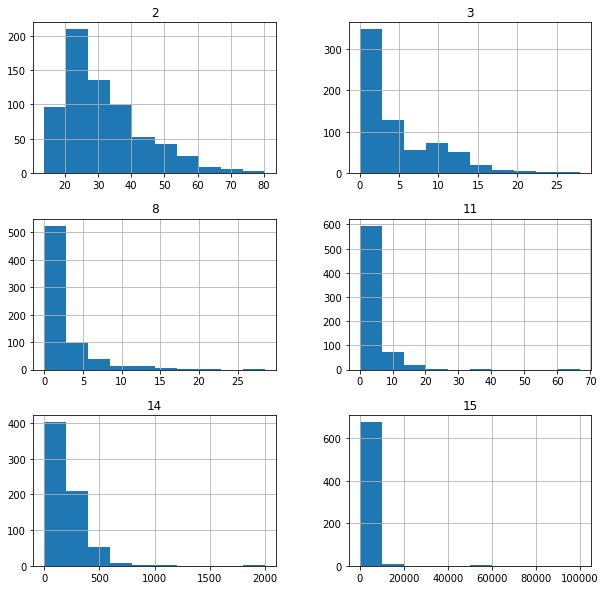

In [23]:
credit.hist(figsize=(10,10));

- Which variables are approximately normally distributed?

Column 2 is the closest to being normalyl distributed, though each column is skew right to varying degrees. It's a bit difficult to see exactly because there are some wicked outliers making the visualizations difficult.

- Which variables show strong skew?

3, 8, 11, and 14 all show strong skew while 15 is less clear and 2 has slightly weaker skew.

- Make a scatterplot of each feature variable with the target variable (`16`).

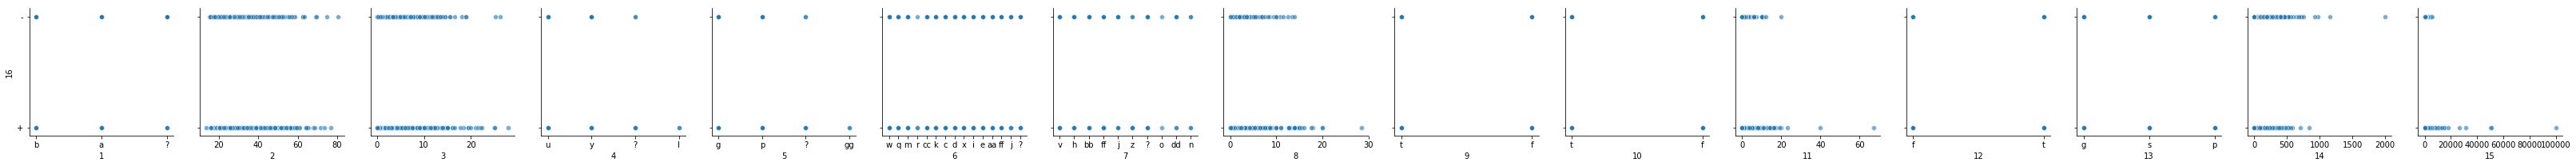

In [24]:
sns.pairplot(
    data=credit,
    x_vars=credit.drop(16, axis='columns').columns,
    y_vars = [16],
    plot_kws={'alpha':.6},
    height=3
);

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

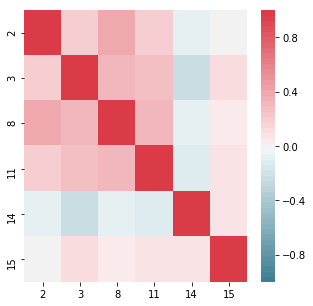

In [25]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(credit.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220,10,n=51)
           )

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

There are some very strongly multi-correlated variables here, especially 2, 3, 8, and 11. It might make sense to include only some or even one of those variables to avoid colinearity issues.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [26]:
credit[16].value_counts(normalize=True)

-    0.555072
+    0.444928
Name: 16, dtype: float64

The accuracy of the null model is 55.5%

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

credit_drop = credit.dropna()
X = credit_drop.drop(16, axis='columns').dropna()
X = pd.get_dummies(X, columns=[1, 4, 5, 6, 7, 9, 10, 12, 13], drop_first=True)
y = credit_drop.loc[:, 16]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
lr = LogisticRegression()

lr.fit(X_train, y_train)
print(f'Training score: {lr.score(X_train, y_train)}')
print(f'Test score: {lr.score(X_test, y_test)}')

Training score: 0.8969957081545065
Test score: 0.86


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performanced substantially better than the null model, which shows that the current model has relatively low bias.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed similarly on the test set and training set, with a gap of only about 3 or 4 percentage points, which is quite small, so there isn't really much of a variance problem.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Of the two, the larger problem seems to be the bias, since the training set performance is 10 percentage points off of 1, but neither is really that concerning to me.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [34]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)
print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 1.0
Test score: 0.825


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

This model performs similarly well on the test set but better (perfectly) on the training set.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

By introducing GridSearchCV, I'm able to use 10-fold cross validation to get a better representation of true performance, and by increasing the number of estimators from 100 to 400, I should be improving the performance of the model, even if it isn't increasing by 10+ percentage points

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(10, shuffle=True)
grid = GridSearchCV(estimator=RandomForestClassifier(n_estimators=400),
                    param_grid={},
                    cv=kf,
                    return_train_score=True,
                    )

grid.fit(X, y)

results = grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])

[1.]
[0.87387387]


- **BONUS:** Keep going! Find ways to make your model better.